In [1]:
#This code is for adaptive GPU usage
import keras.backend as K
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

Using TensorFlow backend.


## Basic Understanding

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('/mnt/home/spicrowdpred/nextGenSpi/Spot_included.csv')

In [5]:
df

Unnamed: 0  Unnamed: 0.1  areacat_strcode areacat_strdesc  \
0           5477526        618601               14           ELITE   
1           5477700        618775               14           ELITE   
2           5487317        628392               14           ELITE   
3           5477701        618776               14           ELITE   
4           5477753        618828               14           ELITE   
5           5477754        618829               14           ELITE   
6           5477929        619004               14           ELITE   
7           5477524        618599               14           ELITE   
8           5477523        618598               14           ELITE   
9           5477928        619003               14           ELITE   
10          5487316        628391               14           ELITE   
11          5484696        625771               14           ELITE   
12          5485201        626276               14           ELITE   
13          5485200        626275               14           ELITE   
14          5485199        626274               14           ELITE   
15          5485157        626232               14           ELITE   
16          5485156        626231               14           ELITE   
17          5477699        618774               14           ELITE   
18          5487267        628342               14           ELITE   
19          5487268        628343               14           ELITE   
20          5478476        619551               14           ELITE   
21          5478477        619552               14           ELITE   
22          5484697        625772               14           ELITE   
23          5478478        619553               14           ELITE   
24          5481991        623066               14           ELITE   
25          5481990        623065               14           ELITE   
26          5480827        621902               14           ELITE   
27          5480826        621901               14           ELITE   
28          5477838        618913               14           ELITE   
29          5477839        618914               14           ELITE   
...             ...           ...              ...             ...   
4520918     2290762          6986               14           ELITE   
4520919     2290369          6593               14           ELITE   
4520920     2290368          6592               14           ELITE   
4520921     2287827          4051               14           ELITE   
4520922     2287828          4052               14           ELITE   
4520923     2290489          6713               18          Budget   
4520924     2284964          1188               14           ELITE   
4520925     2284965          1189               14           ELITE   
4520926     2284966          1190               14           ELITE   
4520927     2287312          3536               18          Budget   
4520928     2287311          3535               18          Budget   
4520929     2284967          1191               14           ELITE   
4520930     2284248           472               14           ELITE   
4520931     2284247           471               14           ELITE   
4520932     2290166          6390               14           ELITE   
4520933     2290167          6391               14           ELITE   
4520934     2285361          1585               14           ELITE   
4520935     2288718          4942               14           ELITE   
4520936     2288719          4943               14           ELITE   
4520937     2285572          1796               14           ELITE   
4520938     2285360          1584               14           ELITE   
4520939     2285571          1795               14           ELITE   
4520940     2285176          1400               14           ELITE   
4520941     2285175          1399               14           ELITE   
4520942     2289215          5439               14           ELITE   
4520943     2289213

In [5]:
df['session_dtmshowing'] =  pd.to_datetime(df['session_dtmshowing'])
df.dtypes

Unnamed: 0                        int64
Unnamed: 0.1                      int64
areacat_strcode                   int64
areacat_strdesc                  object
film_strcode                     object
film_strtitle                    object
screen_bytnum                     int64
screen_strname                   object
screend_strphyrowid              object
screend_strseatid               float64
session_dtmshowing       datetime64[ns]
session_intseatsavail             int64
session_intseatsheld              int64
session_intseatssold              int64
session_intshownumber             int64
session_lngsessionid             object
transt_curvalueeach             float64
transt_dtmdatetime               object
transt_intnoofseats               int64
transt_lgnnumber                 object
dtype: object

In [6]:
pd.options.display.max_rows

60

In [7]:
df

Unnamed: 0  Unnamed: 0.1  areacat_strcode areacat_strdesc  \
0           5477526        618601               14           ELITE   
1           5477700        618775               14           ELITE   
2           5487317        628392               14           ELITE   
3           5477701        618776               14           ELITE   
4           5477753        618828               14           ELITE   
5           5477754        618829               14           ELITE   
6           5477929        619004               14           ELITE   
7           5477524        618599               14           ELITE   
8           5477523        618598               14           ELITE   
9           5477928        619003               14           ELITE   
10          5487316        628391               14           ELITE   
11          5484696        625771               14           ELITE   
12          5485201        626276               14           ELITE   
13          5485200        626275               14           ELITE   
14          5485199        626274               14           ELITE   
15          5485157        626232               14           ELITE   
16          5485156        626231               14           ELITE   
17          5477699        618774               14           ELITE   
18          5487267        628342               14           ELITE   
19          5487268        628343               14           ELITE   
20          5478476        619551               14           ELITE   
21          5478477        619552               14           ELITE   
22          5484697        625772               14           ELITE   
23          5478478        619553               14           ELITE   
24          5481991        623066               14           ELITE   
25          5481990        623065               14           ELITE   
26          5480827        621902               14           ELITE   
27          5480826        621901               14           ELITE   
28          5477838        618913               14           ELITE   
29          5477839        618914               14           ELITE   
...             ...           ...              ...             ...   
4520918     2290762          6986               14           ELITE   
4520919     2290369          6593               14           ELITE   
4520920     2290368          6592               14           ELITE   
4520921     2287827          4051               14           ELITE   
4520922     2287828          4052               14           ELITE   
4520923     2290489          6713               18          Budget   
4520924     2284964          1188               14           ELITE   
4520925     2284965          1189               14           ELITE   
4520926     2284966          1190               14           ELITE   
4520927     2287312          3536               18          Budget   
4520928     2287311          3535               18          Budget   
4520929     2284967          1191               14           ELITE   
4520930     2284248           472               14           ELITE   
4520931     2284247           471               14           ELITE   
4520932     2290166          6390               14           ELITE   
4520933     2290167          6391               14           ELITE   
4520934     2285361          1585               14           ELITE   
4520935     2288718          4942               14           ELITE   
4520936     2288719          4943               14           ELITE   
4520937     2285572          1796               14           ELITE   
4520938     2285360          1584               14           ELITE   
4520939     2285571          1795               14           ELITE   
4520940     2285176          1400               14           ELITE   
4520941     2285175          1399               14           ELITE   
4520942     2289215          5439               14           ELITE   
4520943     2289213

In [8]:
temp=df.loc[df['film_strtitle'].isin(['PK'])&df['session_dtmshowing'].isin(['2015-01-01 09:05:00'])]
temp

Unnamed: 0  Unnamed: 0.1  areacat_strcode areacat_strdesc  \
4093598     5485765        626840               14           ELITE   
4093599     5486680        627755               14           ELITE   
4093600     5483086        624161               14           ELITE   
4093601     5486679        627754               14           ELITE   
4093602     5487805        628880               14           ELITE   
4093603     5487806        628881               14           ELITE   
4093604     5487853        628928               14           ELITE   
4093605     5487854        628929               14           ELITE   
4093606     5486748        627823               14           ELITE   
4093607     5486749        627824               14           ELITE   
4093608     5485766        626841               14           ELITE   
4093609     5487590        628665               14           ELITE   
4093610     5485318        626393               14           ELITE   
4093611     5486678        627753               14           ELITE   
4093612     5487506        628581               14           ELITE   
4093613     5487507        628582               14           ELITE   
4093614     5487508        628583               14           ELITE   
4093615     5487509        628584               14           ELITE   
4093616     5487550        628625               14           ELITE   
4093617     5487551        628626               14           ELITE   
4093618     5487572        628647               14           ELITE   
4093619     5487573        628648               14           ELITE   
4093620     5487589        628664               14           ELITE   
4093621     5483717        624792               14           ELITE   
4093622     5485681        626756               14           ELITE   
4093623     5483715        624790               14           ELITE   
4093624     5486677        627752               14           ELITE   
4093625     5487149        628224               14           ELITE   
4093626     5487148        628223               14           ELITE   
4093627     5487574        628649               14           ELITE   
...             ...           ...              ...             ...   
4093675     5484704        625779               14           ELITE   
4093676     5487233        628308               14           ELITE   
4093677     5486601        627676               14           ELITE   
4093678     5486577        627652               14           ELITE   
4093679     5484792        625867               14           ELITE   
4093680     5484793        625868               14           ELITE   
4093681     5484794        625869               14           ELITE   
4093682     5484795        625870               14           ELITE   
4093683     5486600        627675               14           ELITE   
4093684     5484283        625358               14           ELITE   
4093685     5487038        628113               14           ELITE   
4093686     5487393        628468               14           ELITE   
4093687     5487394        628469               14           ELITE   
4093688     5487417        628492               14           ELITE   
4093689     5485628        626703               14           ELITE   
4093690     5487395        628470               14           ELITE   
4093691     5487396        628471               14           ELITE   
4093692     5485627        626702               14           ELITE   
4093693     5485626        626701               14           ELITE   
4093694     5486624        627699               14           ELITE   
4093695     5486623        627698               14           ELITE   
4093696     5487416        628491               14           ELITE   
4093697     5486622        627697               14           ELITE   
4093698     5486676        627751               14           ELITE   
4093699     5487418        628493               14           ELITE   
4093700     5486621

In [9]:
temp1=df.loc[df['film_strtitle'].isin(['PK'])]
seat_budget=temp1.loc[temp1['areacat_strdesc'].isin(['BUDGET'])]
seat_elite=temp1.loc[temp1['areacat_strdesc'].isin(['ELITE'])]
print(seat_budget.shape,seat_elite.shape,temp1.shape)

(265, 20) (11546, 20) (11811, 20)


In [10]:
sum1=temp1['transt_curvalueeach'].sum()
sum2=temp1['transt_intnoofseats'].sum()
shape1=temp1['transt_curvalueeach'].shape
shape2=temp1['transt_intnoofseats'].shape

print(sum1,' ',sum2)

1387210.0   11779


In [11]:
# pd.set_option('display.height', 500)
# pd.set_option('display.max_rows', 500)
pd.option_context('display.height', 500, 'display.max_rows', 500)
pd.options.display.max_rows=300

In [12]:
temp[['film_strtitle','session_intshownumber','transt_dtmdatetime','session_intseatsavail','session_dtmshowing','transt_intnoofseats']].loc[df['session_intshownumber'].isin(['1'])]

film_strtitle  session_intshownumber   transt_dtmdatetime  \
4093598            PK                      1  2014-12-30 13:15:11   
4093599            PK                      1  2014-12-30 11:05:57   
4093600            PK                      1  2014-12-31 02:05:10   
4093601            PK                      1  2014-12-30 11:05:57   
4093602            PK                      1  2014-12-29 20:53:43   
4093603            PK                      1  2014-12-29 20:53:43   
4093604            PK                      1  2014-12-29 20:30:39   
4093605            PK                      1  2014-12-29 20:30:39   
4093606            PK                      1  2014-12-30 10:55:17   
4093607            PK                      1  2014-12-30 10:55:17   
4093608            PK                      1  2014-12-30 13:15:11   
4093609            PK                      1  2014-12-29 21:57:00   
4093610            PK                      1  2014-12-30 14:39:44   
4093611            PK                      1  2014-12-30 11:05:57   
4093612            PK                      1  2014-12-29 22:18:26   
4093613            PK                      1  2014-12-29 22:18:26   
4093614            PK                      1  2014-12-29 22:18:26   
4093615            PK                      1  2014-12-29 22:18:26   
4093616            PK                      1  2014-12-29 22:05:53   
4093617            PK                      1  2014-12-29 22:05:53   
4093618            PK                      1  2014-12-29 21:57:54   
4093619            PK                      1  2014-12-29 21:57:54   
4093620            PK                      1  2014-12-29 21:57:00   
4093621            PK                      1  2014-12-30 21:48:32   
4093622            PK                      1  2014-12-30 13:27:48   
4093623            PK                      1  2014-12-30 21:48:32   
4093624            PK                      1  2014-12-30 11:05:57   
4093625            PK                      1  2014-12-30 09:25:06   
4093626            PK                      1  2014-12-30 09:25:06   
4093627            PK                      1  2014-12-29 21:57:54   
4093628            PK                      1  2014-12-30 21:48:32   
4093629            PK                      1  2014-12-30 10:48:30   
4093630            PK                      1  2014-12-30 09:34:21   
4093631            PK                      1  2015-01-01 08:27:25   
4093632            PK                      1  2015-01-01 08:27:25   
4093633            PK                      1  2014-12-30 08:50:07   
4093634            PK                      1  2014-12-30 10:36:01   
4093635            PK                      1  2014-12-30 09:34:21   
4093636            PK                      1  2014-12-30 09:34:21   
4093637            PK                      1  2014-12-30 11:44:33   
4093638            PK                      1  2014-12-30 11:44:33   
4093639            PK                      1  2014-12-30 11:44:33   
4093640            PK                      1  2014-12-30 08:50:07   
4093641            PK                      1  2014-12-30 09:34:21   
4093642            PK                      1  2014-12-30 10:51:54   
4093643            PK                      1  2014-12-30 10:51:54   
4093644            PK                      1  2014-12-30 10:48:39   
4093645            PK                      1  2014-12-31 11:12:48   
4093646            PK                      1  2014-12-31 11:12:48   
4093647            PK                      1  2014-12-30 10:48:39   
4093648            PK                      1  2014-12-30 10:48:30   
4093649            PK                      1  2014-12-29 22:25:36   
4093650            PK                      1  2014-12-29 18:35:51   
4093651            PK                      1  2014-12-29 18:35:51   
4093652            PK                      1  2014-12-30 10:36:01   
4093653            PK                      1  2014-12-30 11:17:38   
4093654            PK                      1  2014-12-30 10:36:01   
409365

In [13]:
for x in df['film_strtitle'].unique():
    print(x)

PISSASU
PK
KAYAL
KAPPAL
LINGAA
UNBROKEN
TEVAR
TAKEN 3
GOPALA GOPALA
I
DARLING
BABY
YENNAI ARINDHAAL
SHAMITABH
ANEGAN
THAMIZHUKKU ENN ONDRAI AZHUTHAVUM
BADLAPUR
KAAKI SATTAI
ENAKKUL ORUVAN
IVANUKU THANILA GANDAM
KINGSMAN THE SECRET SERVICE
VALIYAVAN
KOMBAN
FAST AND FURIOUS 7
S O SATYA MURTHY
AVENGERS AGE OF ULTRON
UTTAMA VILLAIN
VAI RAJA VAI
O KADHAL KANMANI
PIKU
36 VAYADHINILE
MAD MAX FURY ROAD
DEMONTE COLONY
MASSU ENGIRA MASILAMANI
PREMAM
KAKKA MUTTAI
JURASSIC WORLD
ABCD 2
TERMINATOR GENISYS
PAPANASAM
BAAHUBALI TELUGU
BAAHUBALI TAMIL
MAARI
BAJRANGI BHAIJAAN
TRISHA ILLANA NAYANTHARA
MAYA
PULI
PAN
TALVAR
JAZBAA
THE MARTIAN
NAANUM ROWDYDHAAN
10 ENDRADHUKKULLA
GOOSEBUMPS
PYAAR KA PUNCHNAMA 2
PARANORMAL ACTIVITY THE GHOST DIMENSION
THE WALK
BRIDGE OF SPIES
VEDALAM
THOONGAAVANAM
SPECTRE
TAMASHA
URUMEEN
INJI IDUPAZHAGI
EETTI
BAJIRAO MASTANI
DILWALE
THANGAMAGAN
PASANGA 2
BHOOLOHAM
STAR WARS THE FORCE AWAKENS
THE GOOD DINOSAUR
POINT BREAK
WAZIR
THAARAI THAPPATTAI
RAJINI MURUGAN
AIRLIFT
THE 5TH

In [14]:
X=df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [15]:
X['Year']=pd.DatetimeIndex(X['session_dtmshowing']).year
X['Month']=pd.DatetimeIndex(X['session_dtmshowing']).month
X['Date']=pd.DatetimeIndex(X['session_dtmshowing']).day
X['Time']=pd.DatetimeIndex(X['session_dtmshowing']).time


In [16]:
gk=X.groupby(['Year','Month','Date','session_intshownumber','screen_strname','film_strtitle'])

In [17]:
gk.first()

areacat_strcode  \
Year Month Date session_intshownumber screen_strname film_strtitle                                                
2015 1     1    1                     BLUSH          VELLAKKKARA DURAI                                       14   
                                      CARVE          KAYAL                                                   14   
                                      FRAME          MEAGHAMANN                                              14   
                                      KITES          CHINNADANA NEE KOSAM                                    14   
                                      PLUSH          NIGHT AT THE MUSEUM SECRET OF THE TOMB                  17   
                                      SPOT           PK                                                      14   
                                      STREAK         PISSASU                                                 14   
                                      WEAVE          LINGAA                                                  14   
                2                     BLUSH          PISSASU                                                 14   
                                      CARVE          ONE                                                     14   
                                      FRAME          MEAGHAMANN                                              14   
                                      KITES          CHINNADANA NEE KOSAM                                    14   
                                      PLUSH          LINGAA                                                  14   
                                      SPOT           NIGHT AT THE MUSEUM SECRET OF THE TOMB                  14   
                                      STREAK         PK                                                      14   
                                      WEAVE          VELLAKKKARA DURAI                                       14   
                3                     BLUSH          VELLAKKKARA DURAI                                       14   
                                      CARVE          PK                                                      14   
                                      FRAME          THE HOBBIT: THE BATTLE OF THE FIVE ARMIES               14   
                                      KITES          KAPPAL                                                  14   
                                      PLUSH          LINGAA                                                  14   
                                      SPOT           MEAGHAMANN                                              14   
                                      STREAK         KAYAL                                                   14   
                                      WEAVE          PISSASU                                                 14   
                4                     BLUSH          VELLAKKKARA DURAI                                       14   
                                      CARVE          PK                                                      14   
                                      FRAME          NIGHT AT THE MUSEUM SECRET OF THE TOMB                  14   
                                      KITES          KAPPAL                                                  14   
                                      PLUSH          LINGAA                                                  14   
                                      SPOT           BLIND DATE                                              14   
                                      STREAK         KAYAL                                                   14   
                                      WEAVE          PISSASU                                                 14   
                5                     BLUSH          VELLAKKKARA DURAI                                       14   
                                      CARVE          KAYAL             

In [ ]:
gk.head()

In [ ]:
tup=("2015","1","1","1","BLUSH","KAYAL")
gk.get_group(tup)

## Film attributes consolidated


In [18]:
films=pd.DataFrame(columns=['Film','BoxOffice','Tickets','Elite','Budget'])

In [19]:
films['Film'] =df['film_strtitle'].unique()   

In [20]:
for x in films['Film']:
    temp1=df.loc[df['film_strtitle'].isin([x])]
    films['BoxOffice'].loc[films['Film'].isin([x])]=temp1['transt_curvalueeach'].sum()
    films['Tickets'].loc[films['Film'].isin([x])]=temp1['transt_intnoofseats'].sum()
    films['Elite'].loc[films['Film'].isin([x])]=temp1.loc[df['areacat_strdesc'] == 'ELITE', 'transt_intnoofseats'].sum()
    films['Budget'].loc[films['Film'].isin([x])]=temp1.loc[df['areacat_strdesc'] == 'BUDGET', 'transt_intnoofseats'].sum()    

KeyboardInterrupt: 

In [ ]:
# pd.set_option('float_format', '{:2f}'.format)
# pd.options.display.float_format = +'{:,.2f}'.format
# films.round('BoxOffice')
films

In [ ]:
a=df.groupby(['film_strtitle']).sum()
a

## Show features

In [21]:
Y=df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
Y['Year']=pd.DatetimeIndex(X['session_dtmshowing']).year
Y['Month']=pd.DatetimeIndex(X['session_dtmshowing']).month
Y['Date']=pd.DatetimeIndex(X['session_dtmshowing']).day
Y['Time']=pd.DatetimeIndex(X['session_dtmshowing']).time

In [22]:
gg=Y.groupby(['Year','Month','Date','screen_strname','film_strtitle','areacat_strdesc'])

In [23]:
gg.first()

areacat_strcode  \
Year Month Date screen_strname film_strtitle                             areacat_strdesc                    
2015 1     1    BLUSH          PISSASU                                   BUDGET                        17   
                                                                         ELITE                         14   
                               VELLAKKKARA DURAI                         BUDGET                        17   
                                                                         ELITE                         14   
                CARVE          KAYAL                                     BUDGET                        17   
                                                                         ELITE                         14   
                               ONE                                       ELITE                         14   
                               PK                                        BUDGET                        17   
                                                                         ELITE                         14   
                FRAME          MEAGHAMANN                                BUDGET                        17   
                                                                         ELITE                         14   
                               NIGHT AT THE MUSEUM SECRET OF THE TOMB    BUDGET                        17   
                                                                         ELITE                         14   
                               THE HOBBIT: THE BATTLE OF THE FIVE ARMIES ELITE                         14   
                KITES          CHINNADANA NEE KOSAM                      BUDGET                        17   
                                                                         ELITE                         14   
                               KAPPAL                                    BUDGET                        17   
                                                                         ELITE                         14   
                PLUSH          LINGAA                                    BUDGET                        17   
                                                                         ELITE                         14   
                               NIGHT AT THE MUSEUM SECRET OF THE TOMB    BUDGET                        17   
                                                                         ELITE                         14   
                SPOT           BLIND DATE                                BUDGET                        17   
                                                                         ELITE                         14   
                               MEAGHAMANN                                BUDGET                        17   
                                                                         ELITE                         14   
                               NIGHT AT THE MUSEUM SECRET OF THE TOMB    BUDGET                        17   
                                                                         ELITE                         14   
                               PK                                        BUDGET                        17   
                                                                         ELITE                         14   
                STREAK         KAYAL                                     BUDGET                        17   
                                                                         ELITE                         14   
                               PISSASU                                   ELITE                         14   
                               PK                                        BUDGET                        17   
                                                                         ELITE                         14   
                WEAVE          LINGAA                    

In [ ]:
for name,group in gg:
    print(name)
    print(group["transt_curvalueeach"].sum())

In [ ]:
gg.first()

In [ ]:
Y['Seats Booked']=df.groupby()

## Show data

In [45]:
newdf=df[df.transt_intnoofseats == 1]

In [46]:
newdf.shape

(4510150, 20)

In [47]:
Y=newdf.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
Y['Year']=pd.DatetimeIndex(Y['session_dtmshowing']).year
Y['Month']=pd.DatetimeIndex(Y['session_dtmshowing']).month
Y['Date']=pd.DatetimeIndex(Y['session_dtmshowing']).day
Y['Time']=pd.DatetimeIndex(Y['session_dtmshowing']).time
gg=Y.groupby(['Year','Month','Date','Time','screen_strname','film_strtitle','areacat_strdesc'])

In [48]:
gg.first()

areacat_strcode  \
Year Month Date Time     screen_strname film_strtitle                             areacat_strdesc                    
2015 1     1    08:15:00 PLUSH          NIGHT AT THE MUSEUM SECRET OF THE TOMB    BUDGET                        17   
                                                                                  ELITE                         14   
                08:50:00 KITES          CHINNADANA NEE KOSAM                      BUDGET                        17   
                                                                                  ELITE                         14   
                09:00:00 STREAK         PISSASU                                   ELITE                         14   
                09:05:00 SPOT           PK                                        BUDGET                        17   
                                                                                  ELITE                         14   
                09:35:00 BLUSH          VELLAKKKARA DURAI                         ELITE                         14   
                09:40:00 FRAME          MEAGHAMANN                                BUDGET                        17   
                                                                                  ELITE                         14   
                         WEAVE          LINGAA                                    ELITE                         14   
                09:50:00 CARVE          KAYAL                                     BUDGET                        17   
                                                                                  ELITE                         14   
                11:00:00 PLUSH          LINGAA                                    BUDGET                        17   
                                                                                  ELITE                         14   
                12:00:00 KITES          CHINNADANA NEE KOSAM                      BUDGET                        17   
                                                                                  ELITE                         14   
                         STREAK         PK                                        BUDGET                        17   
                                                                                  ELITE                         14   
                12:30:00 SPOT           NIGHT AT THE MUSEUM SECRET OF THE TOMB    BUDGET                        17   
                                                                                  ELITE                         14   
                12:45:00 BLUSH          PISSASU                                   BUDGET                        17   
                                                                                  ELITE                         14   
                12:50:00 FRAME          MEAGHAMANN                                ELITE                         14   
                13:00:00 CARVE          ONE                                       ELITE                         14   
                13:20:00 WEAVE          VELLAKKKARA DURAI                         BUDGET                        17   
                                                                                  ELITE                         14   
                14:50:00 PLUSH          LINGAA                                    BUDGET                        17   
                                                                                  ELITE                         14   
                15:10:00 KITES          KAPPAL                                    BUDGET                        17   
                                                                                  ELITE                         14   
                15:20:00 SPOT           MEAGHAMANN                                BUDGET                        17   
                                                                                  ELITE

In [49]:
lists=[]
amount=[]
counts=[]
for name,group in gg:
    lists.append(name)
    amount.append(group["transt_curvalueeach"].sum())
    counts.append(group["transt_intnoofseats"].sum())

In [ ]:
for name,group in gg:
    print(group["transt_curvalueeach"].mean())
    print(group["transt_intnoofseats"].mean())

In [52]:
z=pd.DataFrame(lists,columns=['Year','Month','Date','Time','screen_strname','film_strtitle','areacat_strdesc'])

In [53]:
z['total_amount']=amount
z['total_tickets']=counts

In [54]:
z

Year  Month  Date      Time screen_strname  \
0      2015      1     1  08:15:00          PLUSH   
1      2015      1     1  08:15:00          PLUSH   
2      2015      1     1  08:50:00          KITES   
3      2015      1     1  08:50:00          KITES   
4      2015      1     1  09:00:00         STREAK   
5      2015      1     1  09:05:00           SPOT   
6      2015      1     1  09:05:00           SPOT   
7      2015      1     1  09:35:00          BLUSH   
8      2015      1     1  09:40:00          FRAME   
9      2015      1     1  09:40:00          FRAME   
10     2015      1     1  09:40:00          WEAVE   
11     2015      1     1  09:50:00          CARVE   
12     2015      1     1  09:50:00          CARVE   
13     2015      1     1  11:00:00          PLUSH   
14     2015      1     1  11:00:00          PLUSH   
15     2015      1     1  12:00:00          KITES   
16     2015      1     1  12:00:00          KITES   
17     2015      1     1  12:00:00         STREAK   
18     2015      1     1  12:00:00         STREAK   
19     2015      1     1  12:30:00           SPOT   
20     2015      1     1  12:30:00           SPOT   
21     2015      1     1  12:45:00          BLUSH   
22     2015      1     1  12:45:00          BLUSH   
23     2015      1     1  12:50:00          FRAME   
24     2015      1     1  13:00:00          CARVE   
25     2015      1     1  13:20:00          WEAVE   
26     2015      1     1  13:20:00          WEAVE   
27     2015      1     1  14:50:00          PLUSH   
28     2015      1     1  14:50:00          PLUSH   
29     2015      1     1  15:10:00          KITES   
30     2015      1     1  15:10:00          KITES   
31     2015      1     1  15:20:00           SPOT   
32     2015      1     1  15:20:00           SPOT   
33     2015      1     1  15:30:00          BLUSH   
34     2015      1     1  15:30:00          BLUSH   
35     2015      1     1  15:40:00          CARVE   
36     2015      1     1  15:40:00          CARVE   
37     2015      1     1  15:40:00         STREAK   
38     2015      1     1  15:40:00         STREAK   
39     2015      1     1  16:00:00          FRAME   
40     2015      1     1  16:30:00          WEAVE   
41     2015      1     1  16:30:00          WEAVE   
42     2015      1     1  18:30:00          KITES   
43     2015      1     1  18:30:00          KITES   
44     2015      1     1  18:40:00          PLUSH   
45     2015      1     1  18:40:00          PLUSH   
46     2015      1     1  18:45:00           SPOT   
47     2015      1     1  18:45:00           SPOT   
48     2015      1     1  18:50:00          BLUSH   
49     2015      1     1  18:50:00          BLUSH   
50     2015      1     1  19:00:00         STREAK   
51     2015      1     1  19:00:00         STREAK   
52     2015      1     1  19:10:00          CARVE   
53     2015      1     1  19:10:00          CARVE   
54     2015      1     1  19:30:00          FRAME   
55     2015      1     1  19:30:00          FRAME   
56     2015      1     1  19:30:00          WEAVE   
57     2015      1     1  19:30:00          WEAVE   
58     2015      1     1  21:50:00           SPOT   
59     2015      1     1  21:50:00           SPOT   
60     2015      1     1  22:00:00          BLUSH   
61     2015      1     1  22:00:00          BLUSH   
62     2015      1     1  22:00:00          KITES   
63     2015      1     1  22:00:00          KITES   
64     2015      1     1  22:15:00          WEAVE   
65     2015      1     1  22:15:00          WEAVE   
66     2015      1     1  22:20:00          FRAME   
67     2015      1     1  22:20:00         STREAK   
68     2015      1     1  22:20:00         STREAK   
69     2015      1     1  22:30:00          CARVE   
70     2015      1     1  22:30:00          CARVE   
71     2015      1     1  22:30:00          PLUSH   
72     2015      1     2  12:10:00         STREAK   
73     2015      1     2  12:10:00         STREAK   
74     2015      1     2  12:15:

In [ ]:
356*120

In [ ]:
df.loc(df["transt_intnoofseats"]==1)

In [55]:
z.to_csv('money_tick_eachtime.csv')

## Show without ticket type grouping

In [35]:
newdf1=df[df.transt_intnoofseats == 1]

In [36]:
newdf1.shape

(4510150, 20)

In [37]:
Y1=newdf1.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
Y1['Year']=pd.DatetimeIndex(Y1['session_dtmshowing']).year
Y1['Month']=pd.DatetimeIndex(Y1['session_dtmshowing']).month
Y1['Date']=pd.DatetimeIndex(Y1['session_dtmshowing']).day
Y1['Time']=pd.DatetimeIndex(Y1['session_dtmshowing']).time
gg1=Y1.groupby(['Year','Month','Date','Time','screen_strname','film_strtitle'])

In [38]:
gg1.first()

areacat_strcode  \
Year Month Date Time     screen_strname film_strtitle                                                
2015 1     1    08:15:00 PLUSH          NIGHT AT THE MUSEUM SECRET OF THE TOMB                  17   
                08:50:00 KITES          CHINNADANA NEE KOSAM                                    14   
                09:00:00 STREAK         PISSASU                                                 14   
                09:05:00 SPOT           PK                                                      14   
                09:35:00 BLUSH          VELLAKKKARA DURAI                                       14   
                09:40:00 FRAME          MEAGHAMANN                                              14   
                         WEAVE          LINGAA                                                  14   
                09:50:00 CARVE          KAYAL                                                   14   
                11:00:00 PLUSH          LINGAA                                                  14   
                12:00:00 KITES          CHINNADANA NEE KOSAM                                    14   
                         STREAK         PK                                                      14   
                12:30:00 SPOT           NIGHT AT THE MUSEUM SECRET OF THE TOMB                  14   
                12:45:00 BLUSH          PISSASU                                                 14   
                12:50:00 FRAME          MEAGHAMANN                                              14   
                13:00:00 CARVE          ONE                                                     14   
                13:20:00 WEAVE          VELLAKKKARA DURAI                                       14   
                14:50:00 PLUSH          LINGAA                                                  14   
                15:10:00 KITES          KAPPAL                                                  14   
                15:20:00 SPOT           MEAGHAMANN                                              14   
                15:30:00 BLUSH          VELLAKKKARA DURAI                                       14   
                15:40:00 CARVE          PK                                                      14   
                         STREAK         KAYAL                                                   14   
                16:00:00 FRAME          THE HOBBIT: THE BATTLE OF THE FIVE ARMIES               14   
                16:30:00 WEAVE          PISSASU                                                 14   
                18:30:00 KITES          KAPPAL                                                  14   
                18:40:00 PLUSH          LINGAA                                                  14   
                18:45:00 SPOT           BLIND DATE                                              14   
                18:50:00 BLUSH          VELLAKKKARA DURAI                                       14   
                19:00:00 STREAK         KAYAL                                                   14   
                19:10:00 CARVE          PK                                                      14   
                19:30:00 FRAME          NIGHT AT THE MUSEUM SECRET OF THE TOMB                  14   
                         WEAVE          PISSASU                                                 14   
                21:50:00 SPOT           MEAGHAMANN                                              14   
                22:00:00 BLUSH          VELLAKKKARA DURAI                                       14   
                         KITES          KAPPAL                                                  14   
                22:15:00 WEAVE          PISSASU                                                 14   
                22:20:00 FRAME          THE HOBBIT: THE BATTLE OF THE FIVE ARMIES               14   
                         STREAK         PK                                                      14   
   

In [39]:
lists1=[]
amount1=[]
counts1=[]
for name,group in gg1:
    lists1.append(name)
    amount1.append(group["transt_curvalueeach"].sum())
    counts1.append(group["transt_intnoofseats"].sum())

In [40]:
z1=pd.DataFrame(lists1,columns=['Year','Month','Date','Time','screen_strname','film_strtitle'])

In [42]:
z1['total_amount']=amount1
z1['total_tickets']=counts1

In [43]:
z1

Year  Month  Date      Time screen_strname  \
0      2015      1     1  08:15:00          PLUSH   
1      2015      1     1  08:50:00          KITES   
2      2015      1     1  09:00:00         STREAK   
3      2015      1     1  09:05:00           SPOT   
4      2015      1     1  09:35:00          BLUSH   
5      2015      1     1  09:40:00          FRAME   
6      2015      1     1  09:40:00          WEAVE   
7      2015      1     1  09:50:00          CARVE   
8      2015      1     1  11:00:00          PLUSH   
9      2015      1     1  12:00:00          KITES   
10     2015      1     1  12:00:00         STREAK   
11     2015      1     1  12:30:00           SPOT   
12     2015      1     1  12:45:00          BLUSH   
13     2015      1     1  12:50:00          FRAME   
14     2015      1     1  13:00:00          CARVE   
15     2015      1     1  13:20:00          WEAVE   
16     2015      1     1  14:50:00          PLUSH   
17     2015      1     1  15:10:00          KITES   
18     2015      1     1  15:20:00           SPOT   
19     2015      1     1  15:30:00          BLUSH   
20     2015      1     1  15:40:00          CARVE   
21     2015      1     1  15:40:00         STREAK   
22     2015      1     1  16:00:00          FRAME   
23     2015      1     1  16:30:00          WEAVE   
24     2015      1     1  18:30:00          KITES   
25     2015      1     1  18:40:00          PLUSH   
26     2015      1     1  18:45:00           SPOT   
27     2015      1     1  18:50:00          BLUSH   
28     2015      1     1  19:00:00         STREAK   
29     2015      1     1  19:10:00          CARVE   
30     2015      1     1  19:30:00          FRAME   
31     2015      1     1  19:30:00          WEAVE   
32     2015      1     1  21:50:00           SPOT   
33     2015      1     1  22:00:00          BLUSH   
34     2015      1     1  22:00:00          KITES   
35     2015      1     1  22:15:00          WEAVE   
36     2015      1     1  22:20:00          FRAME   
37     2015      1     1  22:20:00         STREAK   
38     2015      1     1  22:30:00          CARVE   
39     2015      1     1  22:30:00          PLUSH   
40     2015      1     2  12:10:00         STREAK   
41     2015      1     2  12:15:00          KITES   
42     2015      1     2  12:45:00           SPOT   
43     2015      1     2  12:55:00          PLUSH   
44     2015      1     2  13:10:00          CARVE   
45     2015      1     2  13:15:00          FRAME   
46     2015      1     2  13:30:00          WEAVE   
47     2015      1     2  13:50:00          BLUSH   
48     2015      1     2  15:20:00          KITES   
49     2015      1     2  15:35:00         STREAK   
50     2015      1     2  15:45:00          FRAME   
51     2015      1     2  15:50:00           SPOT   
52     2015      1     2  16:15:00          BLUSH   
53     2015      1     2  16:15:00          CARVE   
54     2015      1     2  16:30:00          PLUSH   
55     2015      1     2  16:30:00          WEAVE   
56     2015      1     2  18:40:00          KITES   
57     2015      1     2  18:40:00         STREAK   
58     2015      1     2  18:55:00          BLUSH   
59     2015      1     2  19:05:00          FRAME   
60     2015      1     2  19:10:00           SPOT   
61     2015      1     2  19:20:00          CARVE   
62     2015      1     2  19:20:00          PLUSH   
63     2015      1     2  19:30:00          WEAVE   
64     2015      1     2  21:50:00          FRAME   
65     2015      1     2  21:55:00          BLUSH   
66     2015      1     2  22:00:00          KITES   
67     2015      1     2  22:05:00          PLUSH   
68     2015      1     2  22:05:00          WEAVE   
69     2015      1     2  22:15:00         STREAK   
70     2015      1     2  22:25:00          CARVE   
71     2015      1     2  22:30:00           SPOT   
72     2015      1     3  08:55:00          KITES   
73     2015      1     3  09:00:00         STREAK   
74     2015      1     3  09:25:

In [56]:
z1.to_csv("money_tick_eachshowtime_withouttixtype.csv")

## Day collection

In [39]:
newdf1=df[df.transt_intnoofseats == 1]

In [40]:
newdf1.shape

(4510150, 20)

In [41]:
Y2=newdf1.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
Y2['Year']=pd.DatetimeIndex(Y2['session_dtmshowing']).year
Y2['Month']=pd.DatetimeIndex(Y2['session_dtmshowing']).month
Y2['Date']=pd.DatetimeIndex(Y2['session_dtmshowing']).day
gg2=Y2.groupby(['Year','Month','Date','film_strtitle'])

In [42]:
gg2.first()

areacat_strcode  \
Year Month Date film_strtitle                                                
2015 1     1    BLIND DATE                                              14   
                CHINNADANA NEE KOSAM                                    14   
                KAPPAL                                                  14   
                KAYAL                                                   14   
                LINGAA                                                  14   
                MEAGHAMANN                                              14   
                NIGHT AT THE MUSEUM SECRET OF THE TOMB                  17   
                ONE                                                     14   
                PISSASU                                                 14   
                PK                                                      14   
                THE HOBBIT: THE BATTLE OF THE FIVE ARMIES               14   
                VELLAKKKARA DURAI                                       14   
           2    KAPPAL                                                  17   
                KAYAL                                                   14   
                LINGAA                                                  14   
                MEAGHAMANN                                              14   
                NAGARA VARITHI NADUVIL NJAAN                            14   
                NIGHT AT THE MUSEUM SECRET OF THE TOMB                  14   
                ONE                                                     14   
                PISSASU                                                 14   
                PK                                                      14   
                THE HOBBIT: THE BATTLE OF THE FIVE ARMIES               14   
                THE WOMAN IN BLACK 2 ANGEL OF DEATH                     14   
                UNBROKEN                                                14   
                VELLAKKKARA DURAI                                       14   
           3    KAPPAL                                                  14   
                KAYAL                                                   14   
                LINGAA                                                  14   
                MEAGHAMANN                                              14   
                NAGARA VARITHI NADUVIL NJAAN                            14   
...                                                                    ...   
2017 11    26   GOLMAAL AGAIN                                           14   
                GURU UCHATHTHULA IRUKKARU                               14   
                INDRAJITH                                               14   
                IPPADAI VELLUM                                          14   
                JUSTICE LEAGUE                                          14   
                LALI                                                    14   
                MERSAL                                                  14   
                MURDER ON THE ORIENT EXPRESS                            14   
                QARIB QARIB SINGLLE                                     14   
                SECRET SUPERSTAR                                        14   
                THEERAN ADHIGARAM ONDRU                                 14   
                THOR RAGNAROK                                           14   
                TUMHARI SULU                                            14   
           27   JUSTICE LEAGUE                                          14   
                MURDER ON THE ORIENT EXPRESS                            14   
                SECRET SUPERSTAR                                        14   
                THEERAN ADHIGARAM ONDRU                                 14   
                THOR RAGNAROK                                           14   
                TUMHARI SULU                                            14   
   

In [43]:
lists2=[]
amount2=[]
counts2=[]
for name,group in gg2:
    lists2.append(name)
    amount2.append(group["transt_curvalueeach"].sum())
    counts2.append(group["transt_intnoofseats"].sum())

In [44]:
z2=pd.DataFrame(lists2,columns=['Year','Month','Date','film_strtitle'])

In [45]:
z2['total_amount']=amount2
z2['total_tickets']=counts2

In [46]:
z2.head()

Year  Month  Date         film_strtitle  total_amount  total_tickets
0  2015      1     1            BLIND DATE       13000.0            112
1  2015      1     1  CHINNADANA NEE KOSAM       19430.0            172
2  2015      1     1                KAPPAL       35900.0            323
3  2015      1     1                 KAYAL       88930.0            775
4  2015      1     1                LINGAA      133750.0           1121

In [74]:
z2.to_csv("money_tick_eachday_withouttixtype.csv")

## Monthwise


In [75]:
newdf1=df[df.transt_intnoofseats == 1]

In [76]:
newdf1.shape

(4510150, 20)

In [77]:
Y3=newdf1.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
Y3['Year']=pd.DatetimeIndex(Y3['session_dtmshowing']).year
Y3['Month']=pd.DatetimeIndex(Y3['session_dtmshowing']).month
gg3=Y3.groupby(['Year','Month','film_strtitle'])

In [78]:
gg3.first()

areacat_strcode  \
Year Month film_strtitle                                                
2015 1     AAMBALA                                                 14   
           AMERICAN SNIPER                                         14   
           BABY                                                    14   
           BIRDMAN                                                 14   
           BLIND DATE                                              14   
           CHINNADANA NEE KOSAM                                    14   
           DARLING                                                 14   
           DHARANI                                                 14   
           DOLLY KI DOLI                                           14   
           FOXCATCHER                                              14   
           GOPALA GOPALA                                           14   
           HAWAIZAADA                                              14   
           I                                                       14   
           ISAI                                                    14   
           KAPPAL                                                  17   
           KAYAL                                                   14   
           KHAMOSHIYAN SILENCES HAVE SECRETS                       14   
           KILLADI                                                 14   
           LINGAA                                                  14   
           MARIYAM MUKKU                                           14   
           MEAGHAMANN                                              14   
           MORTDECAI                                               14   
           NAGARA VARITHI NADUVIL NJAAN                            14   
           NIGHT AT THE MUSEUM SECRET OF THE TOMB                  17   
           ONE                                                     14   
           PATAS                                                   14   
           PICKET 43                                               14   
           PISSASU                                                 14   
           PK                                                      14   
           PONGE EZHU MANOHARA                                     14   
           PULAN VISARANAI 2                                       14   
           SEVENTH SON                                             14   
           SHARAFAT GAYI TEL LENE                                  14   
           TAKEN 3                                                 14   
           TEVAR                                                   14   
           THE HOBBIT: THE BATTLE OF THE FIVE ARMIES               14   
           THE IMITATION GAME                                      14   
           THE THEORY OF EVERYTHING                                14   
           THE WOMAN IN BLACK 2 ANGEL OF DEATH                     14   
           THOTTAL THODARUM                                        14   
           TOURING TALKIES                                         14   
           UNBROKEN                                                14   
           VELLAKKKARA DURAI                                       14   
     2     AADU                                                    14   
           AAMBALA                                                 14   
           AB TAK CHHAPPAN 2                                       14   
           AMERICAN SNIPER                                         14   
           ANEGAN                                                  14   
           BABY                                                    14   
           BADLAPUR                                                14   
           BIRDMAN                                                 14   
           BLIND DATE                                              14   
           DARLING                                                 14   
           DHARANI                     

In [79]:
lists3=[]
amount3=[]
counts3=[]
for name,group in gg3:
    lists3.append(name)
    amount3.append(group["transt_curvalueeach"].sum())
    counts3.append(group["transt_intnoofseats"].sum())

In [80]:
z3=pd.DataFrame(lists3,columns=['Year','Month','film_strtitle'])

In [83]:
z3['total_amount']=amount3
z3['total_tickets']=counts3

In [84]:
z3

Year  Month                              film_strtitle  total_amount  \
0     2015      1                                    AAMBALA    1502140.00   
1     2015      1                            AMERICAN SNIPER     199990.00   
2     2015      1                                       BABY     512610.00   
3     2015      1                                    BIRDMAN      47690.00   
4     2015      1                                 BLIND DATE      39820.00   
5     2015      1                       CHINNADANA NEE KOSAM      19430.00   
6     2015      1                                    DARLING     928330.00   
7     2015      1                                    DHARANI      13930.00   
8     2015      1                              DOLLY KI DOLI     109900.00   
9     2015      1                                 FOXCATCHER      25370.00   
10    2015      1                              GOPALA GOPALA     444420.00   
11    2015      1                                 HAWAIZAADA      23540.00   
12    2015      1                                          I    4629640.00   
13    2015      1                                       ISAI     147460.00   
14    2015      1                                     KAPPAL     904630.00   
15    2015      1                                      KAYAL     513180.00   
16    2015      1          KHAMOSHIYAN SILENCES HAVE SECRETS      25730.00   
17    2015      1                                    KILLADI      19780.00   
18    2015      1                                     LINGAA     520230.00   
19    2015      1                              MARIYAM MUKKU      53130.00   
20    2015      1                                 MEAGHAMANN     545820.00   
21    2015      1                                  MORTDECAI      60730.00   
22    2015      1               NAGARA VARITHI NADUVIL NJAAN      30040.00   
23    2015      1     NIGHT AT THE MUSEUM SECRET OF THE TOMB     411270.00   
24    2015      1                                        ONE      44700.00   
25    2015      1                                      PATAS      72620.00   
26    2015      1                                  PICKET 43      61850.00   
27    2015      1                                    PISSASU     667610.00   
28    2015      1                                         PK    1054830.00   
29    2015      1                        PONGE EZHU MANOHARA       3240.00   
30    2015      1                          PULAN VISARANAI 2      25220.00   
31    2015      1                                SEVENTH SON      25880.00   
32    2015      1                     SHARAFAT GAYI TEL LENE      56820.00   
33    2015      1                                    TAKEN 3     709320.00   
34    2015      1                                      TEVAR     445560.00   
35    2015      1  THE HOBBIT: THE BATTLE OF THE FIVE ARMIES     326020.00   
36    2015      1                         THE IMITATION GAME     202790.00   
37    2015      1                   THE THEORY OF EVERYTHING     199870.00   
38    2015      1        THE WOMAN IN BLACK 2 ANGEL OF DEATH     309580.00   
39    2015      1                           THOTTAL THODARUM      62850.00   
40    2015      1                            TOURING TALKIES      13860.00   
41    2015      1                                   UNBROKEN      83750.00   
42    2015      1                          VELLAKKKARA DURAI     402590.00   
43    2015      2                                       AADU      32260.00   
44    2015      2                                    AAMBALA     134790.00   
45    2015      2                          AB TAK CHHAPPAN 2      51740.00   
46    2015      2                            AMERICAN SNIPER     373130.00   
47    2015      2                                     ANEGAN    2036200.00   
48    2015      2                                       BABY     591270.00   
49    2015      2                                   BADLAPUR     346810.00   
50    2015      2           

In [85]:
z3.to_csv("money_tick_eachmonth_withouttixtype.csv")

## Lifetime of a Movie

In [18]:
newdf1=df[df.transt_intnoofseats == 1]

In [19]:
newdf1.shape

(4510150, 20)

In [20]:
Y4=newdf1.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
Y4['Year']=pd.DatetimeIndex(Y4['session_dtmshowing']).year
Y4['Month']=pd.DatetimeIndex(Y4['session_dtmshowing']).month
Y4['Date']=pd.DatetimeIndex(Y4['session_dtmshowing']).day
gg4=Y4.groupby(['film_strtitle','Year','Month','Date'])

In [93]:
gg4.first()

areacat_strcode  \
film_strtitle                            Year Month Date                    
1 AM                                     2017 3     24                 17   
                                                    25                 14   
                                                    26                 14   
                                                    27                 14   
                                                    28                 14   
10 CLOVERFIELD LANE                      2016 4     29                 14   
                                                    30                 14   
                                              5     1                  14   
                                                    2                  14   
                                                    3                  14   
                                                    4                  14   
                                                    5                  14   
                                                    6                  14   
                                                    7                  14   
                                                    8                  14   
                                                    9                  14   
                                                    10                 14   
                                                    11                 14   
                                                    12                 14   
10 ENDRADHUKKULLA                        2015 10    21                 14   
                                                    22                 14   
                                                    23                 14   
                                                    24                 14   
                                                    25                 14   
                                                    26                 14   
                                                    27                 14   
                                                    28                 14   
                                                    29                 17   
                                                    30                 14   
                                                    31                 14   
                                              11    1                  14   
                                                    2                  14   
                                                    3                  14   
                                                    4                  14   
                                                    5                  14   
                                                    6                  14   
                                                    7                  14   
                                                    8                  14   
                                                    9                  14   
100 DAYS OF LOVE                         2015 3     20                 17   
                                                    21                 14   
                                                    22                 14   
                                                    23                 14   
                                                    24                 14   
                                                    25                 14   
                                                    26                 14   
                                                    27                 14   
                                                    28                 14   
                                                    29                 14   
                                                    30                 14   
                                                    31

In [23]:
lists4=[]
for name,group in gg4:
    lists4.append(name)

In [22]:
z4=pd.DataFrame(lists4,columns=['film_strtitle','Year','Month','Date'])

In [24]:
z4['sum']=1

In [137]:
z4

film_strtitle  Year  Month  Date  sum
0                                          1 AM  2017      3    24    1
1                                          1 AM  2017      3    25    1
2                                          1 AM  2017      3    26    1
3                                          1 AM  2017      3    27    1
4                                          1 AM  2017      3    28    1
5                           10 CLOVERFIELD LANE  2016      4    29    1
6                           10 CLOVERFIELD LANE  2016      4    30    1
7                           10 CLOVERFIELD LANE  2016      5     1    1
8                           10 CLOVERFIELD LANE  2016      5     2    1
9                           10 CLOVERFIELD LANE  2016      5     3    1
10                          10 CLOVERFIELD LANE  2016      5     4    1
11                          10 CLOVERFIELD LANE  2016      5     5    1
12                          10 CLOVERFIELD LANE  2016      5     6    1
13                          10 CLOVERFIELD LANE  2016      5     7    1
14                          10 CLOVERFIELD LANE  2016      5     8    1
15                          10 CLOVERFIELD LANE  2016      5     9    1
16                          10 CLOVERFIELD LANE  2016      5    10    1
17                          10 CLOVERFIELD LANE  2016      5    11    1
18                          10 CLOVERFIELD LANE  2016      5    12    1
19                            10 ENDRADHUKKULLA  2015     10    21    1
20                            10 ENDRADHUKKULLA  2015     10    22    1
21                            10 ENDRADHUKKULLA  2015     10    23    1
22                            10 ENDRADHUKKULLA  2015     10    24    1
23                            10 ENDRADHUKKULLA  2015     10    25    1
24                            10 ENDRADHUKKULLA  2015     10    26    1
25                            10 ENDRADHUKKULLA  2015     10    27    1
26                            10 ENDRADHUKKULLA  2015     10    28    1
27                            10 ENDRADHUKKULLA  2015     10    29    1
28                            10 ENDRADHUKKULLA  2015     10    30    1
29                            10 ENDRADHUKKULLA  2015     10    31    1
30                            10 ENDRADHUKKULLA  2015     11     1    1
31                            10 ENDRADHUKKULLA  2015     11     2    1
32                            10 ENDRADHUKKULLA  2015     11     3    1
33                            10 ENDRADHUKKULLA  2015     11     4    1
34                            10 ENDRADHUKKULLA  2015     11     5    1
35                            10 ENDRADHUKKULLA  2015     11     6    1
36                            10 ENDRADHUKKULLA  2015     11     7    1
37                            10 ENDRADHUKKULLA  2015     11     8    1
38                            10 ENDRADHUKKULLA  2015     11     9    1
39                             100 DAYS OF LOVE  2015      3    20    1
40                             100 DAYS OF LOVE  2015      3    21    1
41                             100 DAYS OF LOVE  2015      3    22    1
42                             100 DAYS OF LOVE  2015      3    23    1
43                             100 DAYS OF LOVE  2015      3    24    1
44                             100 DAYS OF LOVE  2015      3    25    1
45                             100 DAYS OF LOVE  2015      3    26    1
46                             100 DAYS OF LOVE  2015      3    27    1
47                             100 DAYS OF LOVE  2015      3    28    1
48                             100 DAYS OF LOVE  2015      3    29    1
49                             100 DAYS OF LOVE  2015      3    30    1
50                             100 DAYS OF LOVE  2015      3    31    1
51                             100 DAYS OF LOVE  2015      4     1    1
52                             100 DAYS OF LOVE  2015      4     2    1
53                             100 DAYS OF LOVE  2015      4     3    1
54                             100 DAYS OF LOVE  2015      4     4    1
55

In [118]:
z4.loc[z4['film_strtitle']=='10 ENDRADHUKKULLA'].count()

film_strtitle    20
Year             20
Month            20
Date             20
dtype: int64

In [25]:
lifetime=pd.DataFrame(columns=['Movie','Days'])

In [132]:
lifetime

Empty DataFrame
Columns: [Movie, Days]
Index: []

In [26]:
movies=z4['film_strtitle'].unique()

In [27]:
lifetime['Movie']=movies

In [28]:
num=[]
for index,rows in lifetime.iterrows():
    y=str(rows['Movie'])
    x=z4.loc[z4['film_strtitle']==y]['sum'].sum()
    num.append(x)
    

In [141]:
num

[5,
 14,
 20,
 35,
 7,
 4,
 21,
 20,
 4,
 14,
 3,
 48,
 7,
 56,
 7,
 6,
 11,
 35,
 15,
 14,
 41,
 8,
 14,
 7,
 5,
 29,
 7,
 49,
 2,
 21,
 4,
 7,
 1,
 7,
 35,
 6,
 5,
 2,
 21,
 7,
 61,
 14,
 49,
 7,
 3,
 2,
 5,
 3,
 7,
 8,
 42,
 7,
 42,
 7,
 9,
 14,
 7,
 7,
 21,
 7,
 7,
 7,
 6,
 10,
 42,
 2,
 7,
 19,
 56,
 7,
 12,
 2,
 7,
 7,
 6,
 11,
 10,
 7,
 7,
 48,
 35,
 19,
 7,
 4,
 61,
 2,
 7,
 7,
 7,
 7,
 63,
 7,
 2,
 18,
 35,
 21,
 59,
 7,
 13,
 14,
 5,
 43,
 13,
 4,
 7,
 24,
 6,
 68,
 14,
 5,
 7,
 2,
 20,
 20,
 7,
 14,
 35,
 101,
 35,
 48,
 21,
 13,
 3,
 6,
 7,
 58,
 31,
 3,
 49,
 21,
 7,
 28,
 29,
 70,
 14,
 14,
 21,
 7,
 7,
 49,
 4,
 35,
 1,
 14,
 7,
 29,
 55,
 21,
 7,
 14,
 7,
 7,
 7,
 13,
 8,
 7,
 1,
 1,
 14,
 14,
 29,
 5,
 7,
 7,
 42,
 2,
 5,
 9,
 116,
 5,
 6,
 29,
 4,
 13,
 14,
 14,
 2,
 26,
 14,
 28,
 8,
 6,
 5,
 7,
 21,
 6,
 5,
 2,
 34,
 7,
 31,
 14,
 7,
 20,
 2,
 35,
 5,
 34,
 3,
 16,
 6,
 1,
 7,
 4,
 42,
 7,
 3,
 8,
 7,
 5,
 7,
 48,
 21,
 7,
 5,
 77,
 36,
 13,
 5,
 7,
 41,
 6,
 48,
 4

In [30]:
lifetime

Movie  Days
0                                         1 AM     5
1                          10 CLOVERFIELD LANE    14
2                            10 ENDRADHUKKULLA    20
3                             100 DAYS OF LOVE    35
4     13 HOURS THE SECRET SOLDIERS OF BENGHAZI     7
5                                          143     4
6                                          144    21
7                                  1920 LONDON    20
8                          1971 BEYOND BORDERS     4
9                                  2 COUNTRIES    14
10                               2 PENKUTTIKAL     3
11                                          24    48
12                                31ST OCTOBER     7
13                              36 VAYADHINILE    56
14                                       54321     7
15                               7 HOURS TO GO     6
16                                  7 NAATKKAL    11
17                                8 THOTTAKKAL    35
18                                        A AA    15
19                        A BAD MOMS CHRISTMAS    14
20                              A DOGS PURPOSE    41
21                               A FLYING JATT     8
22                                 A GENTLEMAN    14
23                                        AADU     7
24                                       AAGAM     5
25                                     AAMBALA    29
26                                    AANANDAM     7
27                           AANDAVAN KATTALAI    49
28                             AARAM VETTRUMAI     2
29                               AARATHU SINAM    21
...                                        ...   ...
1090                                     WAZIR    28
1091                            WEDDING PULLAV     3
1092                         WELCOME 2 KARACHI    13
1093                                  WHIPLASH     7
1094                                     WHITE     6
1095                                      WILD     7
1096                                 WILD CARD     7
1097                                    WINNER     7
1098                                    WITHIN     7
1099                        WOLVES AT THE DOOR     7
1100                              WONDER WOMAN    51
1101                                   WRECKER     4
1102                          X MEN APOCALYPSE    28
1103                         X PAST IS PRESENT     7
1104                 XXX RETURN OF XANDER CAGE    27
1105                 YAAGAVARAYINUM NAA KAAKKA    20
1106                                   YAAKKAI     2
1107                          YAANUM THEEYAVAN    10
1108                                 YAAR IVAN     6
1109                                     YAMAN    21
1110                                 YEIDHAVAN     7
1111                         YENDHA NERATHILUM     2
1112                          YENNAI ARINDHAAL    43
1113                        YEVADE SUBRAMANYAM    12
1114                                 YEVANAVAN    10
1115                                    YOOGAN    14
1116                          YUDDHAM SHARANAM     6
1117                                      ZERO    14
1118                                  ZOOTOPIA    41
1119                                    ZUBAAN     2

[1120 rows x 2 columns]

In [145]:
lifetime.loc[lifetime['Movie']=='PK']

Movie  Days
737    PK    57

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

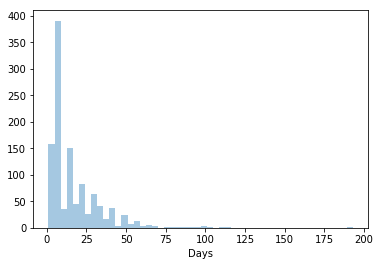

In [150]:
sns.distplot(lifetime['Days'], kde=False);

In [151]:
lifetime.loc[lifetime['Days']>105]

Movie  Days
168  BLIND DATE   116
513  LA LA LAND   112
749      PREMAM   193

## Total number of Shows

In [6]:
newdf1=df[df.transt_intnoofseats == 1]

In [7]:
newdf1.shape

(4510150, 20)

In [8]:
Y5=newdf1.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
Y5['Year']=pd.DatetimeIndex(Y5['session_dtmshowing']).year
Y5['Month']=pd.DatetimeIndex(Y5['session_dtmshowing']).month
Y5['Date']=pd.DatetimeIndex(Y5['session_dtmshowing']).day
Y5['Time']=pd.DatetimeIndex(Y5['session_dtmshowing']).time
gg5=Y5.groupby(['film_strtitle','Year','Month','Date','Time','screen_strname'])

In [9]:
gg5.first()

areacat_strcode  \
film_strtitle       Year Month Date Time     screen_strname                    
1 AM                2017 3     24   21:40:00 FRAME                        17   
                               25   21:40:00 FRAME                        14   
                               26   21:40:00 FRAME                        14   
                               27   21:40:00 FRAME                        14   
                               28   21:40:00 FRAME                        14   
10 CLOVERFIELD LANE 2016 4     29   16:30:00 FRAME                        14   
                               30   16:30:00 FRAME                        14   
                         5     1    16:30:00 FRAME                        14   
                               2    16:30:00 FRAME                        14   
                               3    16:30:00 FRAME                        14   
                               4    16:30:00 FRAME                        14   
                               5    16:30:00 FRAME                        14   
                               6    22:25:00 KITES                        14   
                               7    22:25:00 KITES                        14   
                               8    21:30:00 KITES                        14   
                               9    22:25:00 KITES                        14   
                               10   22:25:00 KITES                        14   
                               11   22:25:00 KITES                        14   
                               12   22:25:00 KITES                        14   
10 ENDRADHUKKULLA   2015 10    21   09:00:00 BLUSH                        14   
                                    12:15:00 STREAK                       14   
                                    15:30:00 STREAK                       14   
                                    18:50:00 STREAK                       14   
                                    22:10:00 STREAK                       14   
                               22   12:15:00 STREAK                       14   
                                    15:30:00 STREAK                       14   
                                    18:50:00 STREAK                       14   
                                    22:10:00 STREAK                       14   
                               23   12:15:00 STREAK                       14   
                                    15:30:00 STREAK                       14   
...                                                                      ...   
ZOOTOPIA            2016 3     25   19:20:00 CARVE                        14   
                               26   13:15:00 CARVE                        14   
                                    19:20:00 CARVE                        14   
                               27   13:15:00 CARVE                        14   
                                    19:20:00 CARVE                        14   
                               28   13:15:00 CARVE                        14   
                                    19:20:00 CARVE                        14   
                               29   13:15:00 CARVE                        14   
                                    19:20:00 CARVE                        14   
                               30   13:15:00 CARVE                        14   
                                    19:20:00 CARVE                        14   
                               31   13:15:00 CARVE                        14   
                                    19:20:00 CARVE                        14   
                         4     1    16:25:00 CARVE                        14   
                               2    10:10:00 CARVE                        14   
                                    16:25:00 CARVE                        14   
                               3    10:00:00 CARVE                        14   
                                    16:25:00 CARVE           

In [10]:
lists6=[]
for name,group in gg5:
    lists6.append(name)

In [11]:
lists6

[('1 AM', 2017, 3, 24, datetime.time(21, 40), 'FRAME'),
 ('1 AM', 2017, 3, 25, datetime.time(21, 40), 'FRAME'),
 ('1 AM', 2017, 3, 26, datetime.time(21, 40), 'FRAME'),
 ('1 AM', 2017, 3, 27, datetime.time(21, 40), 'FRAME'),
 ('1 AM', 2017, 3, 28, datetime.time(21, 40), 'FRAME'),
 ('10 CLOVERFIELD LANE', 2016, 4, 29, datetime.time(16, 30), 'FRAME'),
 ('10 CLOVERFIELD LANE', 2016, 4, 30, datetime.time(16, 30), 'FRAME'),
 ('10 CLOVERFIELD LANE', 2016, 5, 1, datetime.time(16, 30), 'FRAME'),
 ('10 CLOVERFIELD LANE', 2016, 5, 2, datetime.time(16, 30), 'FRAME'),
 ('10 CLOVERFIELD LANE', 2016, 5, 3, datetime.time(16, 30), 'FRAME'),
 ('10 CLOVERFIELD LANE', 2016, 5, 4, datetime.time(16, 30), 'FRAME'),
 ('10 CLOVERFIELD LANE', 2016, 5, 5, datetime.time(16, 30), 'FRAME'),
 ('10 CLOVERFIELD LANE', 2016, 5, 6, datetime.time(22, 25), 'KITES'),
 ('10 CLOVERFIELD LANE', 2016, 5, 7, datetime.time(22, 25), 'KITES'),
 ('10 CLOVERFIELD LANE', 2016, 5, 8, datetime.time(21, 30), 'KITES'),
 ('10 CLOVERFIELD 

In [13]:
shows=pd.DataFrame(lists6,columns=['film_strtitle','Year','Month','Date','Time','screen_strname'])

In [15]:
shows['sum']=1

In [16]:
shows

film_strtitle  Year  Month  Date      Time screen_strname  sum
0                     1 AM  2017      3    24  21:40:00          FRAME    1
1                     1 AM  2017      3    25  21:40:00          FRAME    1
2                     1 AM  2017      3    26  21:40:00          FRAME    1
3                     1 AM  2017      3    27  21:40:00          FRAME    1
4                     1 AM  2017      3    28  21:40:00          FRAME    1
5      10 CLOVERFIELD LANE  2016      4    29  16:30:00          FRAME    1
6      10 CLOVERFIELD LANE  2016      4    30  16:30:00          FRAME    1
7      10 CLOVERFIELD LANE  2016      5     1  16:30:00          FRAME    1
8      10 CLOVERFIELD LANE  2016      5     2  16:30:00          FRAME    1
9      10 CLOVERFIELD LANE  2016      5     3  16:30:00          FRAME    1
10     10 CLOVERFIELD LANE  2016      5     4  16:30:00          FRAME    1
11     10 CLOVERFIELD LANE  2016      5     5  16:30:00          FRAME    1
12     10 CLOVERFIELD LANE  2016      5     6  22:25:00          KITES    1
13     10 CLOVERFIELD LANE  2016      5     7  22:25:00          KITES    1
14     10 CLOVERFIELD LANE  2016      5     8  21:30:00          KITES    1
15     10 CLOVERFIELD LANE  2016      5     9  22:25:00          KITES    1
16     10 CLOVERFIELD LANE  2016      5    10  22:25:00          KITES    1
17     10 CLOVERFIELD LANE  2016      5    11  22:25:00          KITES    1
18     10 CLOVERFIELD LANE  2016      5    12  22:25:00          KITES    1
19       10 ENDRADHUKKULLA  2015     10    21  09:00:00          BLUSH    1
20       10 ENDRADHUKKULLA  2015     10    21  12:15:00         STREAK    1
21       10 ENDRADHUKKULLA  2015     10    21  15:30:00         STREAK    1
22       10 ENDRADHUKKULLA  2015     10    21  18:50:00         STREAK    1
23       10 ENDRADHUKKULLA  2015     10    21  22:10:00         STREAK    1
24       10 ENDRADHUKKULLA  2015     10    22  12:15:00         STREAK    1
25       10 ENDRADHUKKULLA  2015     10    22  15:30:00         STREAK    1
26       10 ENDRADHUKKULLA  2015     10    22  18:50:00         STREAK    1
27       10 ENDRADHUKKULLA  2015     10    22  22:10:00         STREAK    1
28       10 ENDRADHUKKULLA  2015     10    23  12:15:00         STREAK    1
29       10 ENDRADHUKKULLA  2015     10    23  15:30:00         STREAK    1
...                    ...   ...    ...   ...       ...            ...  ...
34928             ZOOTOPIA  2016      3    25  19:20:00          CARVE    1
34929             ZOOTOPIA  2016      3    26  13:15:00          CARVE    1
34930             ZOOTOPIA  2016      3    26  19:20:00          CARVE    1
34931             ZOOTOPIA  2016      3    27  13:15:00          CARVE    1
34932             ZOOTOPIA  2016      3    27  19:20:00          CARVE    1
34933             ZOOTOPIA  2016      3    28  13:15:00          CARVE    1
34934             ZOOTOPIA  2016      3    28  19:20:00          CARVE    1
34935             ZOOTOPIA  2016      3    29  13:15:00          CARVE    1
34936             ZOOTOPIA  2016      3    29  19:20:00          CARVE    1
34937             ZOOTOPIA  2016      3    30  13:15:00          CARVE    1
34938             ZOOTOPIA  2016      3    30  19:20:00          CARVE    1
34939             ZOOTOPIA  2016      3    31  13:15:00          CARVE    1
34940             ZOOTOPIA  2016      3    31  19:20:00          CARVE    1
34941             ZOOTOPIA  2016      4     1  16:25:00          CARVE    1
34942             ZOOTOPIA  2016      4     2  10:10:00          CARVE    1
34943             ZOOTOPIA  2016      4     2  16:25:00          CARVE    1
34944             ZOOTOPIA  2016      4     3  10:00:00          CARVE    1
34945             ZOOTOPIA  2016      4     3  16:25:00          CARVE    1
34946             ZOOTOPIA  2016      4     4  16:25:00          CARVE    1
34947             ZOOTOPIA  2016      4     5  16:25:00          CARVE    1
34948             ZOOTOPIA  2016      4     6  16:25:00      

In [31]:
num1=[]
for index,rows in lifetime.iterrows():
    y=str(rows['Movie'])
    x=shows.loc[shows['film_strtitle']==y]['sum'].sum()
    num1.append(x)
    

In [32]:
lifetime['Shows']=num1

In [33]:
lifetime

Movie  Days  Shows
0                                         1 AM     5      5
1                          10 CLOVERFIELD LANE    14     14
2                            10 ENDRADHUKKULLA    20     57
3                             100 DAYS OF LOVE    35     43
4     13 HOURS THE SECRET SOLDIERS OF BENGHAZI     7     14
5                                          143     4      4
6                                          144    21     37
7                                  1920 LONDON    20     20
8                          1971 BEYOND BORDERS     4      4
9                                  2 COUNTRIES    14     14
10                               2 PENKUTTIKAL     3      3
11                                          24    48    116
12                                31ST OCTOBER     7      7
13                              36 VAYADHINILE    56     92
14                                       54321     7      7
15                               7 HOURS TO GO     6      6
16                                  7 NAATKKAL    11     11
17                                8 THOTTAKKAL    35     41
18                                        A AA    15     21
19                        A BAD MOMS CHRISTMAS    14     14
20                              A DOGS PURPOSE    41     41
21                               A FLYING JATT     8     15
22                                 A GENTLEMAN    14     24
23                                        AADU     7      7
24                                       AAGAM     5      5
25                                     AAMBALA    29     80
26                                    AANANDAM     7      7
27                           AANDAVAN KATTALAI    49    116
28                             AARAM VETTRUMAI     2      2
29                               AARATHU SINAM    21     51
...                                        ...   ...    ...
1090                                     WAZIR    28     42
1091                            WEDDING PULLAV     3      3
1092                         WELCOME 2 KARACHI    13     14
1093                                  WHIPLASH     7      9
1094                                     WHITE     6      6
1095                                      WILD     7      9
1096                                 WILD CARD     7      9
1097                                    WINNER     7      9
1098                                    WITHIN     7      7
1099                        WOLVES AT THE DOOR     7     14
1100                              WONDER WOMAN    51     97
1101                                   WRECKER     4      4
1102                          X MEN APOCALYPSE    28     47
1103                         X PAST IS PRESENT     7      9
1104                 XXX RETURN OF XANDER CAGE    27     69
1105                 YAAGAVARAYINUM NAA KAAKKA    20     35
1106                                   YAAKKAI     2      2
1107                          YAANUM THEEYAVAN    10     18
1108                                 YAAR IVAN     6      6
1109                                     YAMAN    21     42
1110                                 YEIDHAVAN     7      7
1111                         YENDHA NERATHILUM     2      2
1112                          YENNAI ARINDHAAL    43    178
1113                        YEVADE SUBRAMANYAM    12     14
1114                                 YEVANAVAN    10     10
1115                                    YOOGAN    14     14
1116                          YUDDHAM SHARANAM     6     12
1117                                      ZERO    14     23
1118                                  ZOOTOPIA    41     75
1119                                    ZUBAAN     2      2

[1120 rows x 3 columns]

In [35]:
lifetime.loc[lifetime['Movie']=='PREMAM']

Movie  Days  Shows
749  PREMAM   193    247

In [36]:
lifetime.to_csv('lifetime.csv')